# Max voting, Averaging, & Weighted Averaging voting ( Classification )

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
import seaborn as sns 

In [15]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [16]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [17]:
dataset = pd.DataFrame(df)

In [18]:
dataset

,x1,x2,y
0,0.504837,-0.506078,1
1,0.206019,1.346096,0
2,0.572923,-0.167306,1
3,0.301313,0.838926,0
4,0.436175,0.439200,1
...,...,...,...
995,1.847434,0.384696,1
996,0.812672,-0.389231,1
997,-0.699891,0.994882,0
998,0.868812,0.111901,0


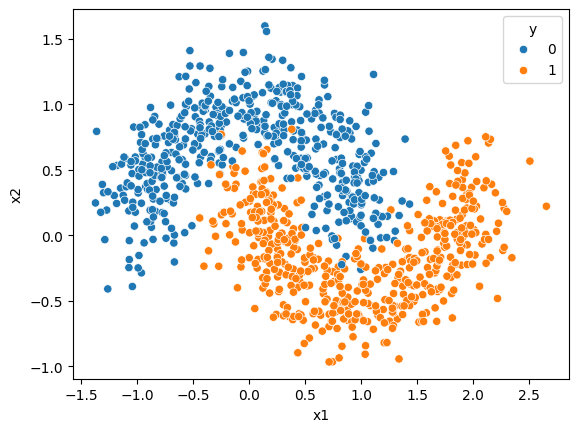

In [19]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [20]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 96.5)

In [28]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [29]:
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(97.25, 97.0)

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [31]:
gnb.score(x_train,y_train)*100 , gnb.score(x_test,y_test)*100

(87.125, 84.0)

In [32]:
from sklearn.ensemble import VotingClassifier

In [34]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [40]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [41]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(97.625, 96.5)

In [47]:
prd = {
    "dt": dt.predict(x_test),
    "svm": sv.predict(x_test),
    "gnb": gnb.predict(x_test),
    "vc": vc.predict(x_test)
}


In [48]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,0,0,0,0
197,1,1,1,1
198,0,0,0,0
